### Example 7.1: An Application of Euler's Method 

Apply Euler's method to solve:

$\frac{ \mathrm{d} y } { \mathrm{d} x } = -xy$ with initial condition $y(0) = 1$ from $x=0$ to $x=3$.

Use various step sizes: $h=0.500, 0.200, 0.100, 0.050, 0.020, 0.010, 0.005, 0.002, 0.001$ and calculate the error relative to the analytical solution $y(x) = \exp{-(x^2/2)}$ at the points $x=1$ and $x=3$. Does it scale as you expect with $h$? 

Plot the $y(x)$ for a few step sizes, e.g. $h=0.500, 0.050, 0.001$, as well as the analytical function. 

Solution:

Let's begin by writing a function that recursively applies Euler's method. 

In [95]:
# Let's write a function that recursively applies Euler's method
# The input parameters should be the function on the right-hand side of the differential equation, which should be a function of x and y
# the initial condition y(xinit)
# the minimum and maximum values of x: xinit and xfinal
# and the step size h
# the return value should be the values of y at the various points x
def EulerMethod(f, yinit, xinit, xfinal, h):
    """Function that applies Euler's method for solving an ODE"""
    # the return lists, starting at the initial values:
    ys = [yinit]
    xs = [xinit]
    # calculatee the number of steps N:
    N = abs(int((xfinal - xinit)/h)) # convert to integer
    for n in range(0,N):
        # get the next value of y:
        ynp1 = ys[n] + h * f(xs[n],ys[n])
        # append to the arrays:
        ys.append(ynp1)
        xs.append(xs[n]+h)
    # return the arrays
    return xs, ys

# the RHS function:
# should take as input x and y:
def fexample(x,y):
    return -x*y

Let's now evaluate this for the specific example and the values of $h$ that we are given.

In [96]:
# the step sizes list
harray=[0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001]
# the initial and final points: 
xinit = 0.0
xfinal = 3.0
# the initial condition: 
yinit=1

# calculate and then print the absolute error:
# put the xs and ys in arrays so we can plot them later
xsharray = []
ysharray = []
for i,h in enumerate(harray):
    xsh, ysh = EulerMethod(fexample, yinit, xinit, xfinal, h)
    # loop over the current x array and find the desired values:
    for j,x in enumerate(xsh):
        # use np.isclose(a,b) to check if a number is close enough to our desired numbers
        if np.isclose(x, 1):
            print('h=', h, 'Absolute Error at y(1)=',abs(np.exp(-1/2)-ysh[j]))            
        if np.isclose(x, 3):
            print('h=', h, 'Absolute Error at y(3)=',abs(np.exp(-9/2)-ysh[j]))            

    # put them into arrays to avoid computing again
    xsharray.append(xsh)
    ysharray.append(ysh)

h= 0.5 Absolute Error at y(1)= 0.14346934028736658
h= 0.5 Absolute Error at y(3)= 0.011108996538242306
h= 0.2 Absolute Error at y(1)= 0.04633078028736648
h= 0.2 Absolute Error at y(3)= 0.006519315386243483
h= 0.1 Absolute Error at y(1)= 0.02162584984266136
h= 0.1 Absolute Error at y(3)= 0.003317899401184511
h= 0.05 Absolute Error at y(1)= 0.010453177958645754
h= 0.05 Absolute Error at y(3)= 0.0016646717622561692
h= 0.02 Absolute Error at y(1)= 0.004097917030359999
h= 0.02 Absolute Error at y(3)= 0.0006664383389157098
h= 0.01 Absolute Error at y(1)= 0.0020353052446446807
h= 0.01 Absolute Error at y(3)= 0.0003332574483653934
h= 0.005 Absolute Error at y(1)= 0.0010142612712193966
h= 0.005 Absolute Error at y(3)= 0.0001666334064354038
h= 0.002 Absolute Error at y(1)= 0.0004048933731869431
h= 0.002 Absolute Error at y(3)= 6.665388110882464e-05
h= 0.001 Absolute Error at y(1)= 0.00020231172884621618
h= 0.001 Absolute Error at y(3)= 3.3326977369865785e-05


Now let's plot them!

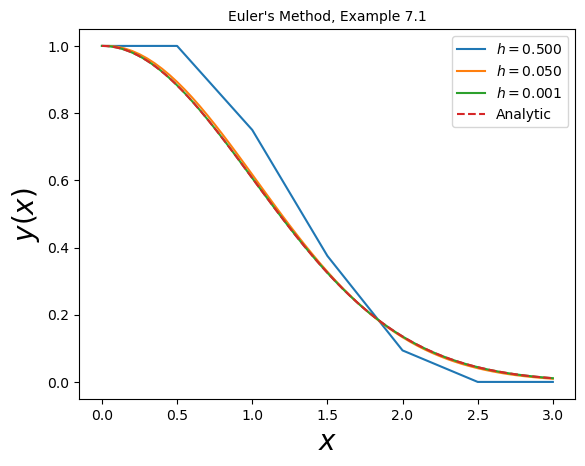

In [97]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# create a NumPy array from 0 to 3
x = np.linspace(0, 3, 300) 

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$y(x)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title("Euler's Method, Example 7.1", fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(xsharray[0], ysharray[0], label='$h=0.500$') 
ax.plot(xsharray[3], ysharray[3], label='$h=0.050$') 
ax.plot(xsharray[-1], ysharray[-1], label='$h=0.001$') 

# plot the analytic result:
yanalytic = np.exp(-np.power(x,2)/2)
ax.plot(x, yanalytic, label='Analytic', ls='--') 

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here